Top 10 Popular Dishes:
Dish Name
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Oatmeal            1
Name: count, dtype: int64


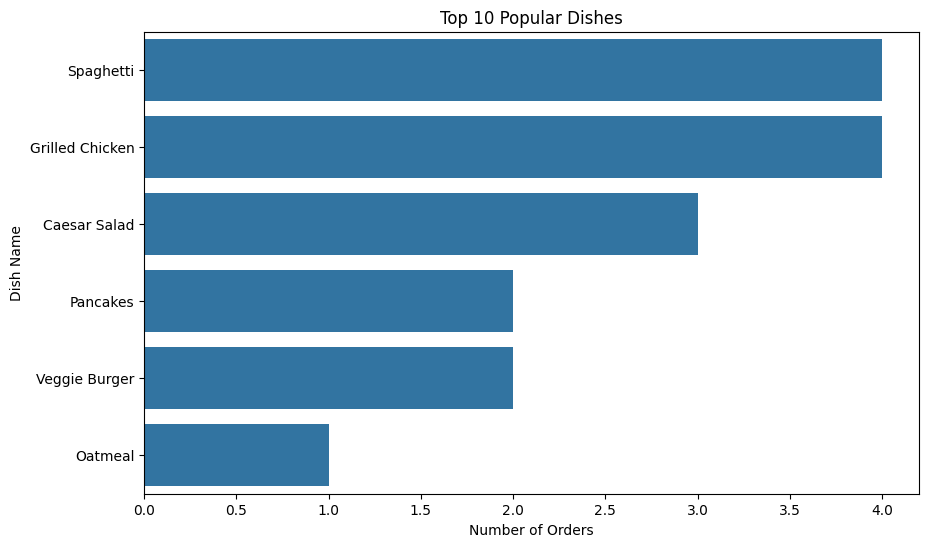

Average Orders per Cooking Session: 1.0


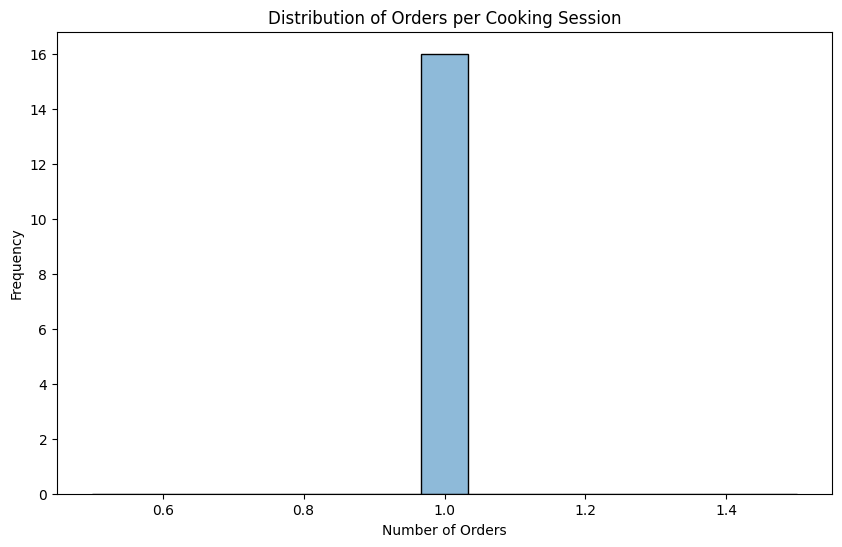

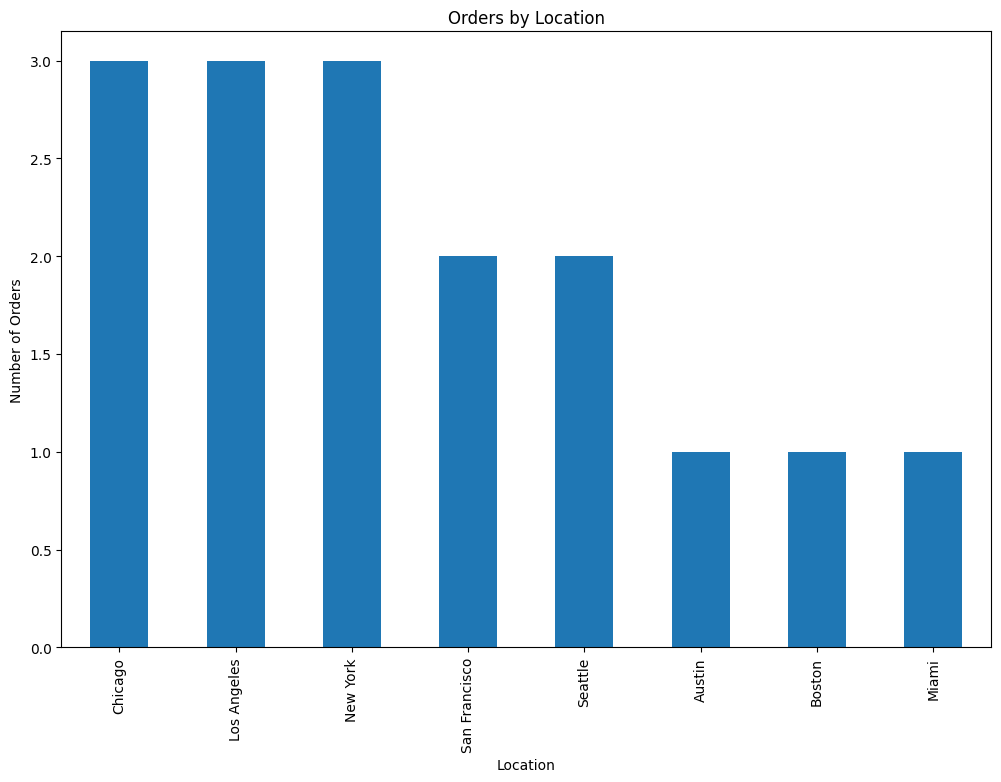

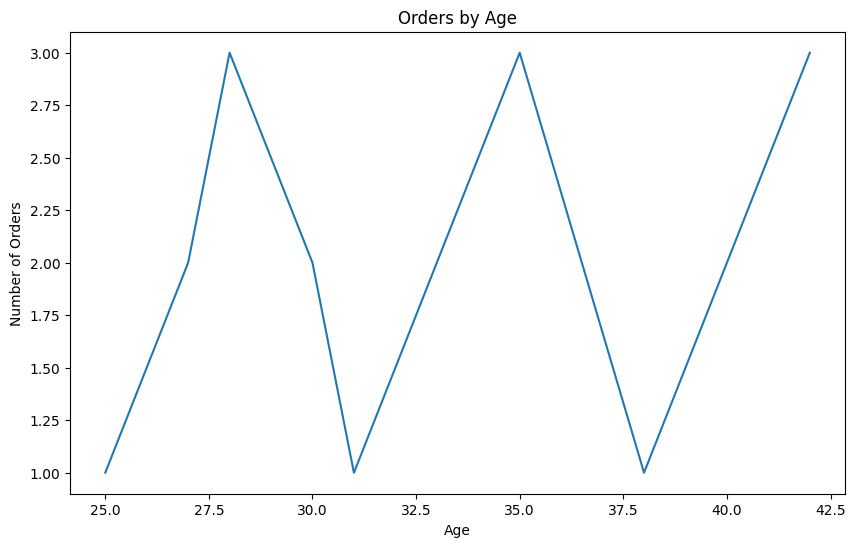

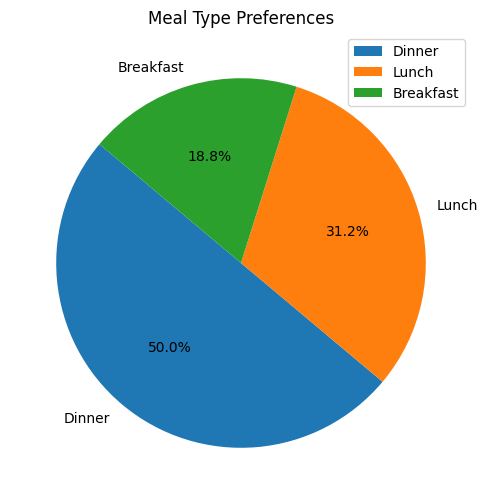

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
order_details_path = "/content/OrderDetails.csv.csv"
cooking_sessions_path = "/content/CookingSessions.csv.csv"
user_details_path = "/content/UserDetails.csv.csv"

# Load datasets
order_details = pd.read_csv(order_details_path)
cooking_sessions = pd.read_csv(cooking_sessions_path)
user_details = pd.read_csv(user_details_path)

# Data Cleaning
# Drop rows with critical missing values in 'User ID' and 'Session ID'
order_details_cleaned = order_details.dropna(subset=['User ID', 'Session ID'])
cooking_sessions_cleaned = cooking_sessions.dropna(subset=['User ID', 'Session ID'])

# Fill missing ratings with 0 as placeholder
order_details_cleaned['Rating'] = order_details_cleaned['Rating'].fillna(0)
cooking_sessions_cleaned['Session Rating'] = cooking_sessions_cleaned['Session Rating'].fillna(0)

# Remove duplicates
order_details_cleaned = order_details_cleaned.drop_duplicates()
cooking_sessions_cleaned = cooking_sessions_cleaned.drop_duplicates()
user_details_cleaned = user_details.drop_duplicates()

# Merging Datasets
# Merge CookingSessions and OrderDetails on 'Session ID', 'User ID', 'Dish Name', and 'Meal Type'
merged_data = pd.merge(
    cooking_sessions_cleaned,
    order_details_cleaned,
    on=['Session ID', 'User ID', 'Dish Name', 'Meal Type'],
    how='inner'
)

# Merge with UserDetails on 'User ID'
final_data = pd.merge(
    merged_data,
    user_details_cleaned,
    on='User ID',
    how='inner'
)

# Save the merged dataset
final_data.to_csv("MergedDataset.csv", index=False)

# Load the cleaned and merged dataset
data = final_data.copy()

# Analysis 1: Popular Dishes
popular_dishes = data['Dish Name'].value_counts().head(10)
print("Top 10 Popular Dishes:")
print(popular_dishes)

# Visualization: Top 10 Popular Dishes
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_dishes.values, y=popular_dishes.index)
plt.title("Top 10 Popular Dishes")
plt.xlabel("Number of Orders")
plt.ylabel("Dish Name")
plt.show()

# Analysis 2: Relationship between Cooking Sessions and Orders
session_order_relation = data.groupby('Session ID')['Order ID'].nunique()
print("Average Orders per Cooking Session:", session_order_relation.mean())

# Visualization: Distribution of Orders per Cooking Session
plt.figure(figsize=(10, 6))
sns.histplot(session_order_relation, kde=True, bins=15)
plt.title("Distribution of Orders per Cooking Session")
plt.xlabel("Number of Orders")
plt.ylabel("Frequency")
plt.show()

# Analysis 3: Demographic Factors Influencing Orders
location_orders = data.groupby('Location')['Order ID'].nunique().sort_values(ascending=False)
age_orders = data.groupby('Age')['Order ID'].nunique()

# Visualization: Orders by Location
plt.figure(figsize=(12, 8))
location_orders.plot(kind='bar')
plt.title("Orders by Location")
plt.xlabel("Location")
plt.ylabel("Number of Orders")
plt.show()

# Visualization: Orders by Age
plt.figure(figsize=(10, 6))
sns.lineplot(x=age_orders.index, y=age_orders.values)
plt.title("Orders by Age")
plt.xlabel("Age")
plt.ylabel("Number of Orders")
plt.show()

# Analysis 4: Meal Type Preferences
meal_type_popularity = data['Meal Type'].value_counts()

# Visualization: Meal Type Preferences
plt.figure(figsize=(8, 6))
meal_type_popularity.plot(kind='pie', autopct='%1.1f%%', startangle=140, legend=True)
plt.title("Meal Type Preferences")
plt.ylabel("")
plt.show()
